In [9]:

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### CNN

In [10]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import Adam

# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
history=model.fit(trainX, trainy, epochs=10, batch_size=32, validation_data=(testX, testy))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7477 - accuracy: 0.8408 - val_loss: 0.3632 - val_accuracy: 0.8687
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3021 - accuracy: 0.8918 - val_loss: 0.3327 - val_accuracy: 0.8816
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2691 - accuracy: 0.9039 - val_loss: 0.3469 - val_accuracy: 0.8828
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2432 - accuracy: 0.9120 - val_loss: 0.3549 - val_accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2228 - accuracy: 0.9190 - val_loss: 0.3462 - val_accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2047 - accuracy: 0.9257 - val_loss: 0.3343 - val_accuracy: 0.8929
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1871 - accuracy: 0.9315 - val_loss: 0.3460 - val_accuracy:

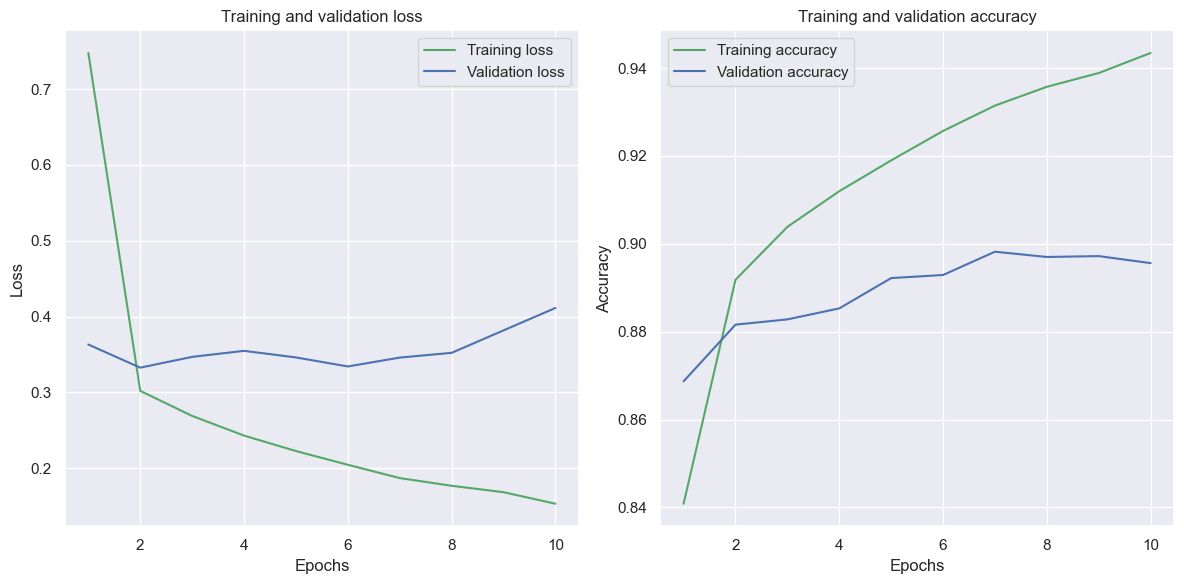

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# "History" object keeps the history of loss and metric values in history.history:
history_dict = history.history

# Plot Training and validation loss:

loss_values = history_dict['loss']  # Loss values for training
val_loss_values = history_dict['val_loss'] # Loss values for validation
epochs = range(1, len(loss_values) + 1) # X-axis values

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and validation accuracy:

acc_values = history_dict['accuracy']  # accuracy values for training
val_acc_values = history_dict['val_accuracy'] # accuracy values for validation

plt.subplot(1,2,2)
plt.plot(epochs, acc_values, 'g', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()